In [1]:
print("oraoraoroaroaoroarooaroao")

oraoraoroaroaoroarooaroao


Convolutional neural network - a feedforward network that can learn feature engineering by itselfs via kernels

tapp

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


path=WindowsPath('c:/Users/Burai/OneDrive/Documents/GitHub/Brian-Gomez-Santiestevez-OPA23GB')
data_path=WindowsPath('c:/Users/Burai/OneDrive/Documents/GitHub/Brian-Gomez-Santiestevez-OPA23GB')
type(image) = <class 'numpy.ndarray'>
image.shape = (390, 190, 4)
(95, 195)
(195, 95, 4)
c:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\processed_images


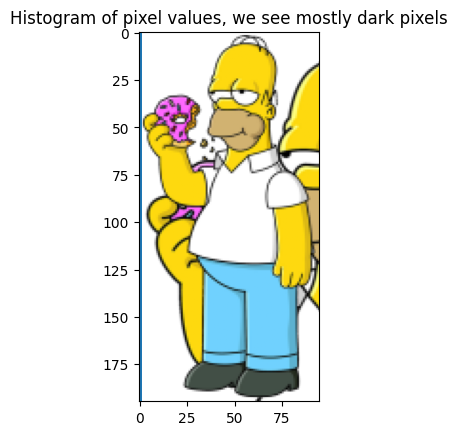

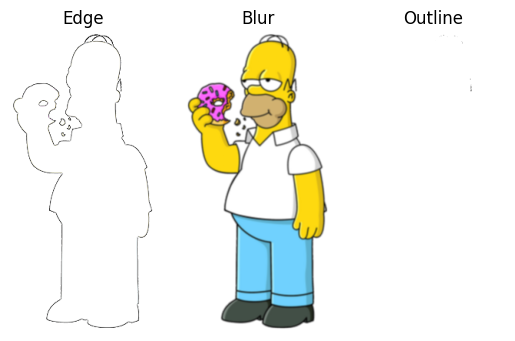

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from pathlib import Path

path = Path().absolute()
print(f"{path=}")

data_path = Path().absolute().parent / "Brian-Gomez-Santiestevez-OPA23GB"
print(f"{data_path=}")

image = plt.imread(data_path / "Homer_Simpson_2006.png")

print(f"{type(image) = }")
# the last dimension indicates that its colors and in 
# open cv it is actually BGR and not RGB 
print(f"{image.shape = }")
min(image.flatten()), max(image.flatten()) 


# ellipses operator ... to give all values in the dimensions before the last 
# same as image[:,:,:3]
# we don't include last dimension as it is the alpha channel representing transparency
plt.hist(image[...,:3].flatten());
plt.title("Histogram of pixel values, we see mostly dark pixels")


plt.imshow(image)


resize_factor = .5
new_size = int(image.shape[1]*resize_factor), int(image.shape[0]*resize_factor), 

print(new_size)
resized_image = cv2.resize(image, new_size)

print(resized_image.shape)

plt.imshow(resized_image)


edge_filter = np.array([[0, -1, 0],
                        [-1, 4, -1],
                        [0, -1, 0]])

blur_filter = np.array([[.0625, .125, .0625],
                        [.125, .25, .125],
                        [.0625, .125, .0625]])

# adjust the values of the filter and see different effects
outline_filter = np.array([[-1, -1, -1],
                           [-1, 4, -1],
                           [-1, -1, -1]])

filters = [edge_filter, blur_filter, outline_filter]
filter_names = ["Edge", "Blur", "Outline"]

# create the folder processed_images inside data folder
processed_images_path = data_path / "processed_images"

print(processed_images_path)
processed_images_path.mkdir(exist_ok=True)

fig, axes = plt.subplots(1,len(filters))

for ax, filter, filter_name in zip(axes, filters, filter_names):
    filtered_img = cv2.filter2D(image,-1, kernel = filter)
    ax.imshow(filtered_img)
    ax.axis("off")
    ax.set(title = f"{filter_name}")

fig.savefig(processed_images_path/ "filtered_images.png")




X_train.shape=(50000, 32, 32, 3), X_test.shape=(10000, 32, 32, 3)
y_train.shape=(50000,), y_test.shape=(10000,)


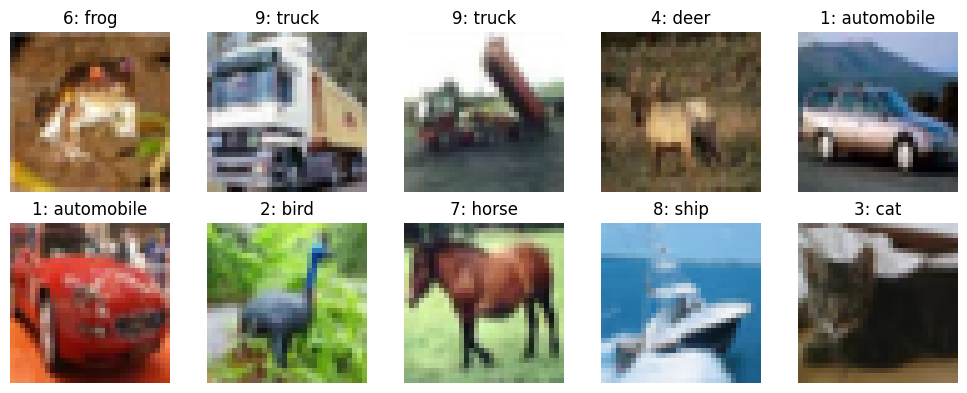

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets.cifar10 import load_data


(X_train, y_train), (X_test, y_test) = load_data()
y_train, y_test = y_train.ravel(), y_test.ravel()

labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

labels_dict = {i: label for i, label in enumerate(labels)}

print(f"{X_train.shape=}, {X_test.shape=}\n{y_train.shape=}, {y_test.shape=}")

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])
    ax.axis("off")
    ax.set_title(f"{y_train[i]}: {labels[y_train[i]]}")
fig.tight_layout()